In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import joblib
import os

In [2]:
data_path='learning_gap_data.csv'
model_path= 'learning_gap_model.pkl'

In [3]:
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: {data_path} not found. Please run generate_learning_gap_data.py first.")
    

In [4]:
features = [
        'quiz_score_prev_topic',
        'time_spent_on_prev_lesson_minutes',
        'num_attempts_on_prev_quiz',
    ]
target = 'struggle_next_concept'


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
X = df[features]
y = df[target]

In [7]:
X.head()

,quiz_score_prev_topic,time_spent_on_prev_lesson_minutes,num_attempts_on_prev_quiz
0,81,83,3
1,44,16,1
2,90,42,3
3,50,32,1
4,53,94,4


In [8]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: struggle_next_concept, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

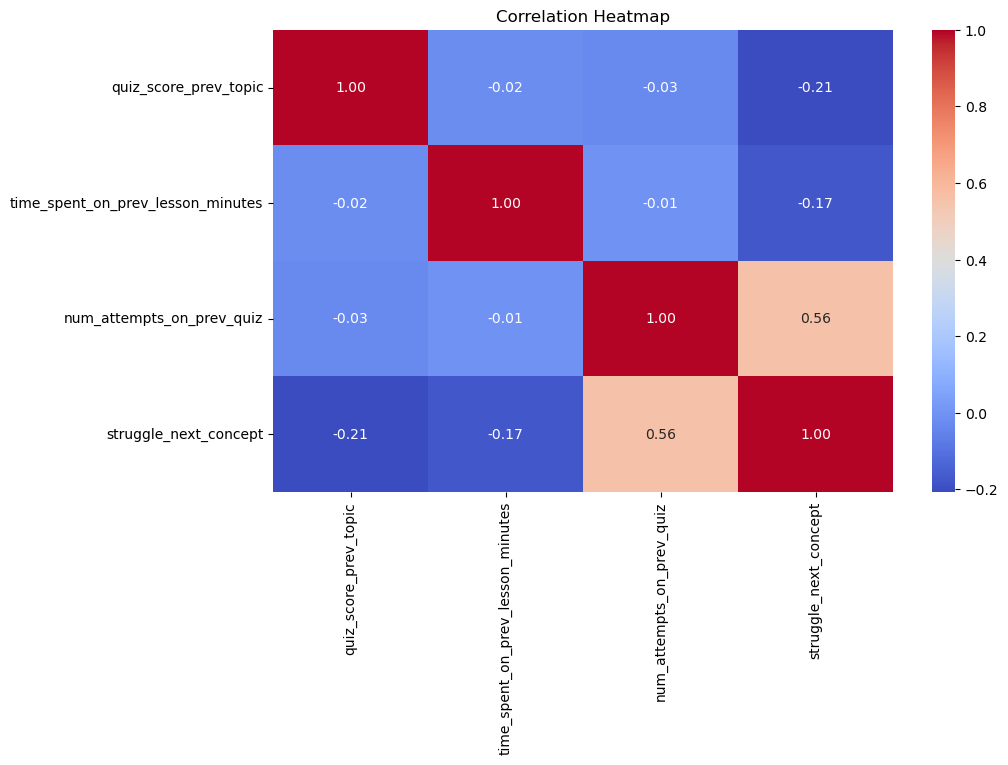

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model_1 = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets
model_1.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [12]:
y_pred = model_1.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       129
           1       0.71      0.81      0.76        67

    accuracy                           0.82       196
   macro avg       0.80      0.82      0.81       196
weighted avg       0.83      0.82      0.82       196



In [13]:
model_2 = SVC(kernel='linear', random_state=42)
model_2.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
y_pred = model_2.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       129
           1       0.71      0.79      0.75        67

    accuracy                           0.82       196
   macro avg       0.80      0.81      0.80       196
weighted avg       0.82      0.82      0.82       196



In [15]:
model_3 = DecisionTreeClassifier(random_state=42)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = model_3.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       129
           1       0.80      0.85      0.83        67

    accuracy                           0.88       196
   macro avg       0.86      0.87      0.87       196
weighted avg       0.88      0.88      0.88       196



In [17]:
model_4 = RandomForestClassifier(n_estimators=20,random_state=42)
model_4.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [18]:
y_pred = model_4.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       129
           1       0.92      0.87      0.89        67

    accuracy                           0.93       196
   macro avg       0.93      0.91      0.92       196
weighted avg       0.93      0.93      0.93       196



In [19]:
joblib.dump(model_4, model_path)
print(f"\nLearning Gap Model saved successfully to {model_path}")


Learning Gap Model saved successfully to learning_gap_model.pkl
